In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
column_names = ['fNames', 'fWidth', 'fSize', 'fConc', 'fConc1',
                'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']

dataset = pd.read_csv(url, names=column_names)
dataset.head()


,fNames,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Shape: (19020, 11)
Missing Values:
 fNames      0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
Class       0
dtype: int64


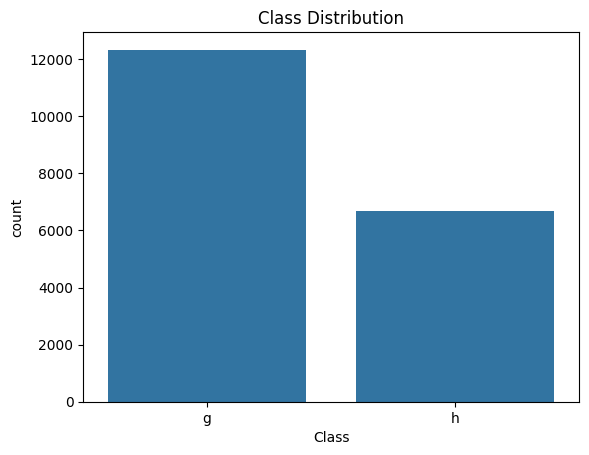

array([[-0.57722602, -0.33680419, -0.38113037, ..., -0.40584194,
         0.47681587, -1.49786555],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.49009359,
        -0.81541816,  0.15312459],
       [ 2.56827756,  6.20585836,  2.61578306, ..., -2.18302986,
         1.88922413,  0.84263513],
       ...,
       [ 0.52392318,  1.38177927,  1.31887687, ..., -0.4665087 ,
         0.10163583,  0.83900338],
       [ 1.58775746,  2.98278123,  2.47337518, ..., -3.07720555,
         2.18525981,  2.87032093],
       [ 3.16145936,  1.67999288,  0.81314905, ...,  1.49930076,
         0.96101431,  1.05044239]])

In [6]:
print("Shape:", dataset.shape)
print("Missing Values:\n", dataset.isnull().sum())


sns.countplot(x='Class', data=dataset)
plt.title("Class Distribution")
plt.show()


X = dataset.iloc[:, 0:-1]
y = dataset['Class']


ss = StandardScaler()
ss.fit_transform(X)


In [7]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

samples


[(        fNames   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans  \
  12085  27.0149  14.6156  2.5250  0.4507  0.2642 -29.2965 -22.5492   -3.6900   
  169    72.9690  19.2006  3.0080  0.2749  0.1537 -47.3236  42.1489  -10.2088   
  5481   82.6882  33.0604  3.8316  0.0984  0.0580  90.8886  42.9439   12.4878   
  9783   54.3867  18.5857  3.1614  0.2255  0.1134  43.3999  42.1384    4.8725   
  13979  13.1359  10.3390  2.1707  0.8105  0.3960 -19.9577  -3.1469  -17.8402   
  ...        ...      ...     ...     ...     ...      ...      ...       ...   
  9225   34.7527  16.3799  2.6212  0.2703  0.1376  21.9455  23.6607    7.2786   
  13123  40.7440  16.0635  2.8145  0.3108  0.1668  15.8622  36.5069   -6.2138   
  9845   35.8286  16.8952  2.8802  0.3070  0.1746  38.7674  17.2509   11.3048   
  10799  20.0986  12.8671  2.4057  0.4558  0.2417  11.5039   9.7434    7.8750   
  2732   27.2726  12.6129  2.7288  0.3978  0.2512 -10.4679 -17.5545   -9.9008   
  
          fAlpha     fDis

In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)


In [9]:
for i in range(len(samples)):
    best_accuracy = 0
    best_C = 0
    best_gamma = 0

    for kernel in kernels:
        X_train, X_test, y_train, y_test = samples[i]
        C = np.random.uniform(0, 1)
        gamma = np.random.uniform(0, 1)
        score = fitnessFunction(kernel, C, gamma)

        if score > best_accuracy:
            best_accuracy = round(score, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel

    print(f'Sample {i+1} | Accuracy: {best_accuracy}, Kernel: {best_kernel}, Nu: {best_C}, Epsilon: {best_gamma}')
    result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]


Sample 1 | Accuracy: 0.68, Kernel: rbf, Nu: 0.88, Epsilon: 0.16
Sample 2 | Accuracy: 0.66, Kernel: linear, Nu: 0.06, Epsilon: 0.13
Sample 3 | Accuracy: 0.71, Kernel: rbf, Nu: 0.3, Epsilon: 0.81
Sample 4 | Accuracy: 0.71, Kernel: rbf, Nu: 0.47, Epsilon: 0.85
Sample 5 | Accuracy: 0.72, Kernel: rbf, Nu: 0.81, Epsilon: 0.74
Sample 6 | Accuracy: 0.64, Kernel: rbf, Nu: 0.64, Epsilon: 0.32
Sample 7 | Accuracy: 0.74, Kernel: rbf, Nu: 0.66, Epsilon: 0.41
Sample 8 | Accuracy: 0.72, Kernel: rbf, Nu: 0.15, Epsilon: 0.72
Sample 9 | Accuracy: 0.71, Kernel: rbf, Nu: 0.44, Epsilon: 0.87
Sample 10 | Accuracy: 0.61, Kernel: rbf, Nu: 0.71, Epsilon: 0.06


In [10]:
result


,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.68,rbf,0.88,0.16
1,2,0.66,linear,0.06,0.13
2,3,0.71,rbf,0.30,0.81
3,4,0.71,rbf,0.47,0.85
4,5,0.72,rbf,0.81,0.74
5,6,0.64,rbf,0.64,0.32
6,7,0.74,rbf,0.66,0.41
7,8,0.72,rbf,0.15,0.72
8,9,0.71,rbf,0.44,0.87
9,10,0.61,rbf,0.71,0.06


In [15]:
best_idx = result['Best Accuracy'].idxmax()
X_train, X_test, y_train, y_test = samples[best_idx]


train_sizes, train_scores, test_scores = learning_curve(
    SVC(
        kernel=result['Best Kernel'].iloc[best_idx],
        C=result['Best Nu'].iloc[best_idx],
        gamma=result['Best Epsilon'].iloc[best_idx],
        max_iter=1000
    ),
    X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)


train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Convergence Graph (Best Sample)')
plt.legend(loc="best")
plt.grid(True)
plt.show()
